In [29]:
import pandas as pd
import numpy as np
import requests
import json
from pprint import pprint
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [229]:
disasters_df = pd.read_csv("../Cleaned Data/disasters.csv")
energyCons_df = pd.read_csv("../Cleaned Data/total_consumption.csv")

energyCons_df
disasters_df


energyCons_df

new_df = energyCons_df.rename(columns = {"total energy consumption (quad Btu)": "Country"}).set_index("Country")
new_energyCons_df = new_df.T
new_energyCons_df.index.name = "Year"
new_energyCons_df

#converting values for energy cons. to two decimal places
world = new_energyCons_df["World"].values.flatten().tolist()
world = [round(float(value),2) for value in world]
world

[324.53,
 334.59,
 347.64,
 352.36,
 358.96,
 352.26,
 351.07,
 353.97,
 357.88,
 367.86,
 377.63,
 378.81,
 381.37,
 389.4,
 402.36,
 405.9,
 414.67,
 429.81,
 450.24,
 465.14,
 479.94,
 493.09,
 499.7,
 494.31,
 523.73,
 538.7,
 550.85,
 561.77,
 567.03,
 570.06,
 573.95]

In [144]:
energyCons_df["1986"][0]

'324.5344016'

In [181]:
#displaying column headers
energyCons_df.columns

Index(['total energy consumption (quad Btu)', '1986', '1987', '1988', '1989',
       '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016'],
      dtype='object')

In [193]:
#grouping each disaster subgroup by year and doign the sum to check the total people affected
grouped_disasters = disasters_df.groupby(["Disaster Subgroup","Year"]).sum()
grouped_disasters

Start Year  End Year  Total Deaths  Total Affected  \
Disaster Subgroup Year                                                       
Biological        1986       47664     47664        3046.0        607855.0   
                  1987       79480     79480        2592.0        612559.0   
                  1988       73556     73557       15216.0        106652.0   
                  1989       33813     33813        1870.0         26346.0   
                  1990       35820     35820        2207.0         39065.0   
...                            ...       ...           ...             ...   
Meteorological    2012      287717    287720        4988.0      20877964.0   
                  2013      237534    237535       10370.0      49042016.0   
                  2014      233624    233626        2600.0      27018396.0   
                  2015      267995    267996        8704.0      11698981.0   
                  2016      193536    193536        2238.0      94787895.0   

                        Total Damages ('000 US$)  
Disaster Subgroup Year                            
Biological        1986                       0.0  
                  1987                       0.0  
                  1988                       0.0  
                  1989                       0.0  
                  1990                       0.0  
...                                          ...  
Meteorological    2012                85889380.0  
                  2013                54002364.0  
                  2014                42738072.0  
                  2015                33159128.0  
                  2016                46838171.0  

[156 rows x 5 columns]

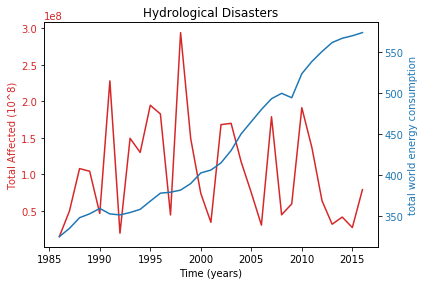

In [243]:
#list of years examined in project
years = list(range(1986,2017))

#selecting only the hydrological disasters
hydro = grouped_disasters.loc[["Hydrological"]]

#code to plot multiple lines in one graph 
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Time (years)')
ax1.set_ylabel('Total Affected (10^8)', color=color)
ax1.plot(years, hydro["Total Affected"], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('total world energy consumption', color=color)  # we already handled the x-label with ax1
ax2.plot(years,world , color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title("Hydrological Disasters")
plt.savefig("../Images/Hydrological.png")
plt.show()

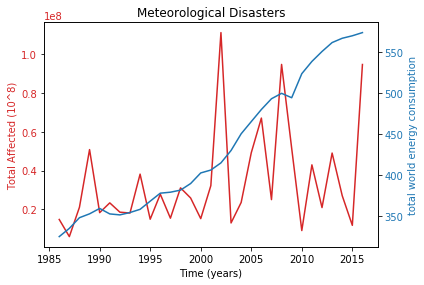

In [244]:
meteor = grouped_disasters.loc[["Meteorological"]]

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Time (years)')
ax1.set_ylabel('Total Affected (10^8)', color=color)
ax1.plot(years, meteor["Total Affected"], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('total world energy consumption', color=color)  # we already handled the x-label with ax1
ax2.plot(years,world , color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title("Meteorological Disasters")
plt.savefig("../Images/meteorological.png")
plt.show()

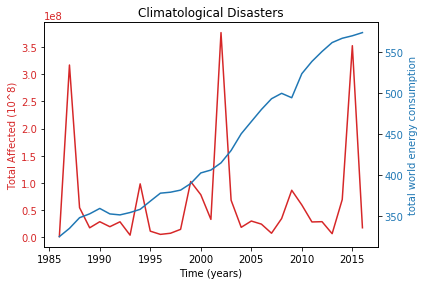

In [245]:
climate = grouped_disasters.loc[["Climatological"]]

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Time (years)')
ax1.set_ylabel('Total Affected (10^8)', color=color)
ax1.plot(years, climate["Total Affected"], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('total world energy consumption', color=color)  # we already handled the x-label with ax1
ax2.plot(years,world , color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title("Climatological Disasters")
plt.savefig("../Images/climatological.png")
plt.show()